In [16]:
import numpy as np
import os
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers
import cv2
import numpy as np
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.applications import NASNetLarge
from ultralytics import YOLO
import torch

In [10]:
print(tf.__version__)

2.12.1


In [11]:
# Path to the directory containing the images
data_dir = "Dataset"
correct_filters_dir = os.path.join(data_dir, "correct_filters")
defect_filters_dir = os.path.join(data_dir, "defect_filters")

In [4]:
# Function to resize images
def resize_images(directory, target_size=(640, 640)):
    for filename in os.listdir(directory):
        img = cv2.imread(os.path.join(directory, filename))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        img = cv2.resize(img, target_size, interpolation=cv2.INTER_LANCZOS4)
        cv2.imwrite(os.path.join(directory, filename), cv2.cvtColor(img, cv2.COLOR_RGB2BGR))

# Resize images in correct_filters_dir
resize_images(correct_filters_dir)

# Resize images in defect_filters_dir
resize_images(defect_filters_dir)

In [5]:
# Function to convert PNG images to JPEG
def convert_png_to_jpg(png_image_path):
    image = Image.open(png_image_path)
    jpg_image_path = os.path.splitext(png_image_path)[0] + ".jpg"
    image.convert("RGB").save(jpg_image_path, "JPEG")
    return jpg_image_path

In [6]:
# Path to the directory containing the images
data_dir = "Dataset"
dataset_paths = ["Dataset/correct_filters", "Dataset/defect_filters"]

In [7]:
# Convert PNG images to JPEG and delete the PNG ones
for dataset_path in dataset_paths:
    for filename in os.listdir(dataset_path):
        if filename.endswith(".png"):
            png_image_path = os.path.join(dataset_path, filename)
            jpg_image_path = convert_png_to_jpg(png_image_path)
            os.remove(png_image_path)
            print("Converted and deleted:", png_image_path, "->", jpg_image_path)
print("Conversion completed.")

Converted and deleted: Dataset/correct_filters/image_42.png -> Dataset/correct_filters/image_42.jpg
Converted and deleted: Dataset/correct_filters/image_51.png -> Dataset/correct_filters/image_51.jpg
Converted and deleted: Dataset/correct_filters/image_36.png -> Dataset/correct_filters/image_36.jpg
Converted and deleted: Dataset/correct_filters/image_53.png -> Dataset/correct_filters/image_53.jpg
Converted and deleted: Dataset/correct_filters/image_9.png -> Dataset/correct_filters/image_9.jpg
Converted and deleted: Dataset/correct_filters/image_32.png -> Dataset/correct_filters/image_32.jpg
Converted and deleted: Dataset/correct_filters/image_4.png -> Dataset/correct_filters/image_4.jpg
Converted and deleted: Dataset/correct_filters/image_68.png -> Dataset/correct_filters/image_68.jpg
Converted and deleted: Dataset/correct_filters/image_23.png -> Dataset/correct_filters/image_23.jpg
Converted and deleted: Dataset/correct_filters/image_7.png -> Dataset/correct_filters/image_7.jpg
Conver

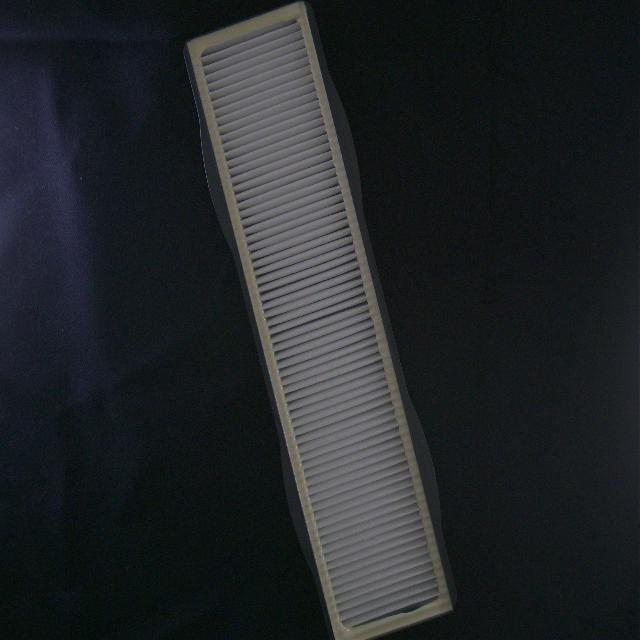

Conversion and opening completed.


In [8]:
# Open the first JPEG image in correct_filters directory
correct_filters_path = dataset_paths[0]
jpg_images = [file for file in os.listdir(correct_filters_path) if file.endswith(".jpg")]
if jpg_images:
    first_jpg_image_path = os.path.join(correct_filters_path, jpg_images[0])
    image = Image.open(first_jpg_image_path)
    image.show()
else:
    print("No JPEG images found in the correct_filters directory.")

print("Conversion and opening completed.")